Download this page as a jupyter notebook at [Lesson 10](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson10/ENGR-1330-Lesson10.ipynb)

# ENGR 1330 Computational Thinking with Data Science 
Copyright © 2021 Theodore G. Cleveland and Farhang Forghanparast

Last GitHub Commit Date: 10 September 2021

## Lesson 10 Databases:
- Fundamental Concepts
    - 

- About NumPy
    - Arrays
    - Array Methods
    - Lesson 8 examples using NumPy to illustrate abstraction to maintainable scripts


In [144]:
# Script block to identify host, user, and kernel
import sys
! hostname; ! whoami; ! pwd; 
print(sys.executable)

atomickitty
sensei
/home/sensei/engr-1330-webroot/1-Lessons/Lesson09
/opt/jupyterhub/bin/python3


In [145]:
%%html
<!-- Script Block to set tables to left alignment -->
<style>
  table {margin-left: 0 !important;}
</style>

---
## Objectives
1. To understand the **dataframe abstraction** as implemented in the Pandas library(module).
    1. To be able to access and manipulate data within a dataframe
    2. To be able to obtain basic statistical measures of data within a dataframe
2. Read/Write from/to files
    1. MS Excel-type files (.xls,.xlsx,.csv) (LibreOffice files use the MS .xml standard)
    2. Ordinary ASCII (.txt) files 
3. Access files directly from a URL (advanced concept)
    1. Using a wget-type function
    2. Using a curl-type function
    3. Using API keys (future versions)


---

## Computational Thinking Concepts

The CT concepts expressed within Databases include:

- `Decomposition` : Break a problem down into smaller pieces; Collections of data are decomposed into their smallest usable part
- `Abstraction` : A database is an abstraction of a collection of data

Suppose we need to store a car as a collection of its parts (implying dissassembly each time we park it), such decompotion would produce a situation like the image.

<img src="https://miro.medium.com/max/590/1*Xfxl8HoQqqg_KtpEsEcskw.jpeg" width="500">

If the location of each part is recorded, then we can determine if something is missing as in 

<img src="modifiedCar.jpeg" width="500">

In the image, the two missing parts are pretty large, and would be evident on a fully assembled car (missing front corner panel, and right rear tire.  Smaller parts would be harder to track on the fully assembled object.  However if we had two fully assembled cars, and when we moved them heard the tink-tink-tink of a ball bearing bouncing on the floor, we would know something is missing - a query of the database to find where all the balls are supposed to be will help us figure out which car is incomplete.

In other contexts  you wouldn’t want to have to take your car apart and store every piece separately whenever you park it in the garage. In that case, you would want to store your car as a single entry in the database (garage), and access its pieces through it (used car parts are usually sourced from fully assembled cars. The U.S. Airforce keeps a lot of otherwise broken aircraft for parts replacement.  As a part is removed it is entered into a database "a transaction" so they know that part is no longer in the broken aircraft lot but in service somewhere.  So the database may locate a part in a bin in a hangar or a part that is residing in an assembled aircraft.  In either case, the hangar (and parts bin) as well as the broken aircarft are both within the database schema - an abstraction.

<img src="boneyard.png" width = "800" >

---

### Databases
Databases are containers for data. A public library stores books, hence we could legitimately state that a library is a database of books. But strictly defined, databases are computer structures that save, organize, protect, and deliver data. A system that contains and manipulates databases is called a database management system, or DBMS.  

A database can be thought of as a kind of electronic filing cabinet; it contains digitized information (“data”), which is kept in persistent storage of some kind. Users can insert new information into the database, and delete, change, or retrieve existing information in the database, by issuing requests or commands to the software that manages the database—which is to say, the database management system (DBMS). 

In practice those user requests to the DBMS can be formulated in a variety of different ways (e.g., by pointing and clicking with a mouse). For our purposes, however, it’s more convenient to assume they’re expressed in the form of simple text strings in some formal language. Given a human resources database, for example, we might write:

And this expression represents a retrieval request—more usually known as a `query` for employee information for employees whose job title is ‘Programmer’.  A query submission and responce is called a transaction.

---
#### Database Types

The simplest form of databases is a text database. When data are organized in a text file in rows and columns, it can be used to store, organize, protect, and retrieve data. Saving a list of names in a file, starting with first name and followed by last name, would be a simple database. Each row of the file represents a record. You can update records by changing specific names, you can remove rows by deleting lines, and you can add new rows by adding new lines.  The term "flat-file" database is a typical analog.

Desktop database programs are another type of database that's more complex than a flat-file text database yet still intended for a single user. A Microsoft Excel spreadsheet or Microsoft Access database are good examples of desktop database programs. These programs allow users to enter data, store it, protect it, and retrieve it when needed. The benefit of desktop database programs over text databases is the speed of changing data, and the ability to store comparatively large amounts of data while keeping performance of the system manageable.

Relational databases are the most common database systems. A relational database contains multiple tables of data with rows and columns that relate to each other through special key fields. These databases are more flexible than flat file structures, and provide functionality for reading, creating, updating, and deleting data. Relational databases use variations of Structured Query Language (SQL) - a standard user application that provides an easy programming interface for database interaction.

Some examples of Relational Database Management Systems (RDMS) are SQL Server, Oracle Database, Sybase, Informix, and MySQL. The relational database management systems (RDMS) exhibit superior performance for managing large collections of for multiple users (even thousands!) to work with the data at the same time, with elaborate security to protect the data. RDBMS systems still store data in columns and rows, which in turn make up tables. A table in RDBMS is like a spreadsheet, or any other flat-file structure. A set of tables makes up a schema. A number of schemas create a database. 

Emergent structures for storing data today are NoSQL and object-oriented databases. These do not follow the table/row/column approach of RDBMS. Instead, they build bookshelves of elements and allow access per bookshelf. So, instead of tracking individual words in books, NoSQL and object-oriented databases narrow down the data you are looking for by pointing you to the bookshelf, then a mechanical assistant works with the books to identify the exact word you are looking for. 

---

#### Relational Database Concepts

The figure below shows sample values for a typical database, having to do with suppliers, parts, and shipments (of parts by suppliers).

<img src="PartsAreParts.png" width="500">

Observe that this database contains three files, or tables. The tables are named S, P, and SP, respectively, and since they’re tables they’re made up of rows and columns (in conventional file terms, the rows correspond to records of the file in question and the columns to fields). They’re meant to be understood as follows:

> Table S represents suppliers under contract. Each supplier has one supplier number (SNO), unique to that supplier; one name (SNAME), not necessarily unique (though the sample values shown in Figure 1-1 do happen to be unique); one status value (STATUS); and one location (CITY). Note: In the rest of this book I’ll abbreviate “suppliers under contract,” most of the time, to just suppliers.

> Table P represents kinds of parts. Each kind of part has one part number (PNO), which is unique; one name (PNAME); one color (COLOR); one weight (WEIGHT); and one location where parts of that kind are stored (CITY). Note: In the rest of this book I’ll abbreviate “kinds of parts,” most of the time, to just parts.

> Table SP represents shipments—it shows which parts are shipped, or supplied, by which suppliers. Each shipment has one supplier number (SNO); one part number (PNO); and one quantity (QTY). Also, there’s at most one shipment at any given time for a given supplier and given part, and so the combination of supplier number and part number is unique to any given shipment.

Real databases tend to be much more complicated than this “toy” example.  However we can make useful observations; these three tables are our schema (our framework for lack of a better word), and at this point is also our only schema, hence it is the `PartsIsParts` database (we have just named the database here)

### Dataframe-type Structure using primative python

First lets construct a dataframe like objects using python primatives, and the *PartsIsParts* database schema


In [281]:
parts = [['PNO','PNAME','COLOR','WEIGHT','CITY'],
         ['P1','Nut','Red',12.0,'London'],
         ['P2','Bolt','Green',17.0,'Paris'],
         ['P3','Screw','Blue',17.0,'Oslo'],
         ['P4','Screw','Red',14.0,'London'],
         ['P5','Cam','Blue',12.0,'Paris'],
         ['P6','Cog','Red',19.0,'London'],]
suppliers = [['SNO','SNAME','STATUS','CITY'],
             ['S1','Smith',20,'London'],
             ['S2','Jones',10,'Paris'],
             ['S3','Blake',30,'Paris'],
             ['S4','Clark',20,'London'],
             ['S5','Adams',30,'Athens'],]
shipments = [['SNO','PNO','QTY'],
             ['S1','P1',300],
             ['S1','P2',200],
             ['S1','P3',400],
             ['S1','P4',200],
             ['S1','P5',100],
             ['S1','P6',100],
             ['S2','P1',300],
             ['S2','P2',400],
             ['S3','P2',200],
             ['S4','P2',200],
             ['S4','P4',300],
             ['S4','P5',400]]

Lets examine some things:

In each table there are columns, these are called fields. There are also rows, these are called records. Hidden from view is a unique record identifier for each record, each table.


Now lets query our database, lets list all parts whose weight is less than 13 - how do we proceede?

- We have to select the right table
- We have to construct a search to find all instances of parts with weight less than 13
- Print the result

For the toy problem not too hard

In [275]:
for i in range(1,len(parts)):
    if parts[i][3] < 13.0 :
        print(parts[i])

['P1', 'Nut', 'Red', 12.0, 'London']
['P5', 'Cam', 'Blue', 12.0, 'Paris']


Now lets query our database, lets list all parts whose weight is less than 13 - but only list the part number, color, and city

- We have to select the right table
- We have to construct a search to find all instances of parts with weight less than 13
- Print the list slice with the requesite information

For the toy problem still not too hard, but immediately we see if this keeps up its going to get kind of tricky fast!; Also it would be nice to be able to refer to a column by its name.

In [276]:
for i in range(1,len(parts)):
    if parts[i][3] < 13.0 :
        print(parts[i][0],parts[i][2],parts[i][4]) # slice the sublist

P1 Red London
P5 Blue Paris


Now lets modify contents of a table.  Lets delete all instances of suppliers with status 10.  Then for remaining suppliers elevate their status by 5.

Again 
- We have to select the right table
- We have to construct a search to find all instances of status equal to 10
- If not equal to 10, copt the row, otherwise skip
- Delete original table, and rename the temporary table

for i in range(1,len(suppliers)):
    if suppliers[i][3] < 13.0 :
        print(suppliers[i][0],suppliers[i][2],suppliers[i][4]) # slice the sublist

In [277]:
temp=[]
for i in range(len(suppliers)):
    print(suppliers[i])
for i in range(0,len(suppliers)):
    if suppliers[i][2] == 10 :
        continue
    else:
        temp.append(suppliers[i]) # slice the sublist
suppliers = temp # attempt to rewrite the original
for i in range(len(suppliers)):
    print(suppliers[i])

['SNO', 'SNAME', 'STATUS', 'CITY']
['S1', 'Smith', 20, 'London']
['S2', 'Jones', 10, 'Paris']
['S3', 'Blake', 30, 'Paris']
['S4', 'Clark', 20, 'London']
['S5', 'Adams', 30, 'Athens']
['SNO', 'SNAME', 'STATUS', 'CITY']
['S1', 'Smith', 20, 'London']
['S3', 'Blake', 30, 'Paris']
['S4', 'Clark', 20, 'London']
['S5', 'Adams', 30, 'Athens']


Now suppose we want to find how many parts are coming from London, our query gets more complex, but still manageable.

However we would ultimately like to build these queries in an easier fashion - that's what Pandas are for

In [221]:
temp=[]
for i in range(0,len(suppliers)):
    if suppliers[i][3] == 'London' :
        temp.append(suppliers[i][0]) # get supplier code from london
    else:
        continue

howmany = 0 # keep count 
for i in range(0,len(shipments)):
    for j in range(len(temp)):
        if shipments[i][0] == temp[j]:
            howmany = howmany + shipments[i][2]
        else:
            continue

print(howmany)

2200


---

## The Pandas module 
- About Pandas
- How to install
    - Anaconda
    - JupyterHub/Lab (on Linux)
    - JupyterHub/Lab (on MacOS)
    - JupyterHub/Lab (on Windoze)
- The Dataframe
    - Primatives
    - Using Pandas
    - Create, Modify, Delete datagrames
    - Slice Dataframes
    - Conditional Selection
    - Synthetic Programming (Symbolic Function Application)
    - Files
- Access Files from a remote Web Server
    - Get file contents
    - Get the actual file
    - Adaptations for encrypted servers (future semester)


---

### Pandas: 
Pandas is the core library for dataframe manipulation in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. The library’s name is derived from the term ‘Panel Data’. 
If you are curious about Pandas, this cheat sheet is recommended: [https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

#### Data Structure 
The Primary data structure is called a dataframe.  It is an **abstraction** where data are represented as a 2-dimensional mutable and heterogenous tabular data structure; much like a Worksheet in MS Excel. The structure itself is popular among statisticians and data scientists and business executives.  

According to the marketing department 
*"Pandas Provides rich data structures and functions designed to make working with data fast, easy, and expressive.  It is useful in data manipulation, cleaning, and analysis; Pandas excels in performance and productivity "*

---

# The Dataframe

A data table is called a `DataFrame` in pandas (and other programming environments too). The figure below from [https://pandas.pydata.org/docs/getting_started/index.html](https://pandas.pydata.org/docs/getting_started/index.html) illustrates a dataframe model:

![](01-table-dataframe.png) 

Each **column** and each **row** in a dataframe is called a series, the header row, and index column are special. 
Like MS Excel we can query the dataframe to find the contents of a particular `cell` using its **row name** and **column name**, or operate on entire **rows** and **columns**

To use pandas, we need to import the module.

---

## Computational Thinking Concepts

The CT concepts expressed within Pandas include:

- `Decomposition` :  Data interpretation, manipulation, and analysis of Pandas dataframes is an act of decomposition -- although the dataframes can be quite complex.
- `Abstraction` : The dataframe is a data representation abstraction that allows for placeholder operations, later substituted with specific contents for a problem; enhances reuse and readability.  We leverage the principle of algebraic replacement using these abstractions.
- `Algorithms` :  Data interpretation, manipulation, and analysis of dataframes are generally implemented as part of a supervisory algorithm.

---

## Module Set-Up

In principle, Pandas should be available in a default Anaconda install 
- You should not have to do any extra installation steps to install the library in Python
- You do have to **import** the library in your scripts

How to check
- Simply open a code cell and run `import pandas` if the notebook does not protest (i.e. pink block of error), the youis good to go.

In [278]:
import pandas

If you do get an error, that means that you will have to install using `conda` or `pip`; you are on-your-own here!  On the **content server** the process is:

1. Open a new terminal from the launcher
2. Change to root user `su` then enter the root password
3. `sudo -H /opt/jupyterhib/bin/python3 -m pip install pandas`
4. Wait until the install is complete; for security, user `compthink` is not in the `sudo` group
5. Verify the install by trying to execute `import pandas` as above.

The process above will be similar on a Macintosh, or Windows if you did not use an Anaconda distribution.   Best is to have a sucessful anaconda install, or go to the [GoodJobUntilMyOrgansGetHarvested](https://apply.mysubwaycareer.com/us/en/). 

If you have to do this kind of install, you will have to do some reading, some references I find useful are:
1. https://jupyterlab.readthedocs.io/en/stable/user/extensions.html
2. https://www.pugetsystems.com/labs/hpc/Note-How-To-Install-JupyterHub-on-a-Local-Server-1673/#InstallJupyterHub
3. https://jupyterhub.readthedocs.io/en/stable/installation-guide-hard.html (This is the approach on the content server which has a functioning JupyterHub)

In [279]:
%reset -f 

---

Now lets repeat the example using Pandas, here we will reuse the original lists, so there is some extra work to get the structures just so

In [282]:
import pandas
partsdf = pandas.DataFrame(parts)
partsdf.set_axis(parts[0][:],axis=1,inplace=True)  # label the columns
partsdf.drop(0, axis=0, inplace = True) # remove the first row that held the column names
partsdf

PNO  PNAME  COLOR WEIGHT    CITY
1  P1    Nut    Red     12  London
2  P2   Bolt  Green     17   Paris
3  P3  Screw   Blue     17    Oslo
4  P4  Screw    Red     14  London
5  P5    Cam   Blue     12   Paris
6  P6    Cog    Red     19  London

In [283]:
suppliersdf = pandas.DataFrame(suppliers)
suppliersdf.set_axis(suppliers[0][:],axis=1,inplace=True)  # label the columns
suppliersdf.drop(0, axis=0, inplace = True) # remove the first row that held the column names
suppliersdf

SNO  SNAME STATUS    CITY
1  S1  Smith     20  London
2  S2  Jones     10   Paris
3  S3  Blake     30   Paris
4  S4  Clark     20  London
5  S5  Adams     30  Athens

In [284]:
shipmentsdf = pandas.DataFrame(shipments)
shipmentsdf.set_axis(shipments[0][:],axis=1,inplace=True)  # label the columns
shipmentsdf.drop(0, axis=0, inplace = True) # remove the first row that held the column names
shipmentsdf

SNO PNO  QTY
1   S1  P1  300
2   S1  P2  200
3   S1  P3  400
4   S1  P4  200
5   S1  P5  100
6   S1  P6  100
7   S2  P1  300
8   S2  P2  400
9   S3  P2  200
10  S4  P2  200
11  S4  P4  300
12  S4  P5  400

Now lets learn about our three dataframes

In [285]:
partsdf.shape  # this is a method to return shape, notice no argument list i.e. no ()

(6, 5)

In [286]:
suppliersdf.shape

(5, 4)

In [287]:
shipmentsdf.shape

(12, 3)

In [288]:
partsdf['COLOR'] #Selecing a single column

1      Red
2    Green
3     Blue
4      Red
5     Blue
6      Red
Name: COLOR, dtype: object

In [292]:
partsdf[['COLOR','CITY']] #Selecing a multiple columns - note the names are supplied as a list

COLOR    CITY
1    Red  London
2  Green   Paris
3   Blue    Oslo
4    Red  London
5   Blue   Paris
6    Red  London

In [293]:
partsdf.loc[[5,6]] #Selecing rows based on label via loc[ ] indexer using row indices - note supplied as a list

PNO PNAME COLOR WEIGHT    CITY
5  P5   Cam  Blue     12   Paris
6  P6   Cog   Red     19  London

Now lets query our dataframes, lets list all parts whose weight is less than 13,

Recall from before:

- We have to select the right table
- We have to construct a search to find all instances of parts with weight less than 13
- Print the list slice with the requesite information

We have to do these same activities, but the syntax is far more readable:

In [294]:
partsdf[partsdf['WEIGHT'] < 13] # from dataframe named partsdf, find all rows in column "WEIGHT less than 13, and return these rows"

PNO PNAME COLOR WEIGHT    CITY
1  P1   Nut   Red     12  London
5  P5   Cam  Blue     12   Paris

Now lets query our dataframe, lets list all parts whose weight is less than 13 - but only list the part number, color, and city

- We have to select the right table
- We have to construct a search to find all instances of parts with weight less than 13
- Print the list slice with the requesite information

Again a more readable syntax

In [295]:
partsdf[partsdf['WEIGHT'] < 13][['PNO','COLOR','CITY']] # from dataframe named partsdf, find all rows in column "WEIGHT less than 13, and return  part number, color, and city from these rows"

PNO COLOR    CITY
1  P1   Red  London
5  P5  Blue   Paris

---

### `head` method

Returns the first few rows, useful to infer structure

In [298]:
shipmentsdf.head() # if you supply an argument you control how many rows are shown i.e. shipmentsdf.head(3) returns first 3 rows

SNO PNO  QTY
1   S1  P1  300
2   S1  P2  200
3   S1  P3  400
4   S1  P4  200
5   S1  P5  100
6   S1  P6  100
7   S2  P1  300
8   S2  P2  400
9   S3  P2  200
10  S4  P2  200
11  S4  P4  300
12  S4  P5  400

---

### `tail` method

Returns the last few rows, useful to infer structure

In [300]:
shipmentsdf.tail()

SNO PNO  QTY
1   S1  P1  300
2   S1  P2  200
3   S1  P3  400
4   S1  P4  200
5   S1  P5  100
6   S1  P6  100
7   S2  P1  300
8   S2  P2  400
9   S3  P2  200
10  S4  P2  200
11  S4  P4  300
12  S4  P5  400

---

### `info` method

Returns the data model (data column count, names, data types)

In [301]:
#Info about the dataframe

suppliersdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SNO     5 non-null      object
 1   SNAME   5 non-null      object
 2   STATUS  5 non-null      object
 3   CITY    5 non-null      object
dtypes: object(4)
memory usage: 200.0+ bytes


---

### `describe` method

Returns summary statistics of each numeric column.  
Also returns the minimum and maximum value in each column, and the IQR (Interquartile Range).  
Again useful to understand structure of the columns.

Our toy example contains limited numeric data, so describe is not too useful - but in general its super useful for engineering databases

In [302]:
#Statistics of the dataframe

partsdf.describe()

PNO  PNAME COLOR  WEIGHT    CITY
count    6      6     6     6.0       6
unique   6      5     3     4.0       3
top     P3  Screw   Red    12.0  London
freq     1      2     3     2.0       3

---

### Examples with "numerical" data

In [303]:
%reset -f

In [304]:
import numpy # we just reset the worksheet, so reimport the packages
import pandas

### Now we shall create a proper dataframe
We will now do the same using pandas

In [312]:
mydf = pandas.DataFrame(numpy.random.randint(1,100,(5,4)), ['A','B','C','D','E'], ['W','X','Y','Z'])
mydf

W   X   Y   Z
A  44  97  66  84
B  33  80  97  52
C   6  87  67  59
D  13  35  36  96
E  11   9  21  80

---

### Getting the shape of dataframes

The shape method, which is available after the dataframe is constructed, will return the row and column rank (count) of a dataframe.

In [313]:
mydf.shape

(5, 4)

---

### Appending new columns
To append a column simply assign a value to a new column name to the dataframe

In [314]:
mydf['new']= 'NA'

In [315]:
mydf

W   X   Y   Z new
A  44  97  66  84  NA
B  33  80  97  52  NA
C   6  87  67  59  NA
D  13  35  36  96  NA
E  11   9  21  80  NA

---
### Appending new rows
This is sometimes a bit trickier but here is one way:
- create a copy of a row, give it a new name. 
- concatenate it back into the dataframe.

In [316]:
newrow = mydf.loc[['E']].rename(index={"E": "X"}) # create a single row, rename the index
newtable = pandas.concat([mydf,newrow]) # concatenate the row to bottom of df - note the syntax

In [317]:
newtable

W   X   Y   Z new
A  44  97  66  84  NA
B  33  80  97  52  NA
C   6  87  67  59  NA
D  13  35  36  96  NA
E  11   9  21  80  NA
X  11   9  21  80  NA

---

### Removing Rows and Columns

To remove a column is straightforward, we use the drop method

In [318]:
newtable.drop('new', axis=1, inplace = True)
newtable

W   X   Y   Z
A  44  97  66  84
B  33  80  97  52
C   6  87  67  59
D  13  35  36  96
E  11   9  21  80
X  11   9  21  80

To remove a row, you really got to want to, easiest is probablty to create a new dataframe with the row removed

In [319]:
newtable = newtable.loc[['A','B','D','E','X']] # select all rows except C
newtable

W   X   Y   Z
A  44  97  66  84
B  33  80  97  52
D  13  35  36  96
E  11   9  21  80
X  11   9  21  80

In [245]:
# or just use drop with axis specify
newtable.drop('X', axis=0, inplace = True)

In [246]:
newtable

W   X   Y   Z
A  73  43  57  63
B  31  74  47  53
D  77  22  93  45
E  73  58  89  59

---

## Indexing
We have already been indexing, but a few examples follow:

In [247]:
newtable['X'] #Selecing a single column

A    43
B    74
D    22
E    58
Name: X, dtype: int64

In [248]:
newtable[['X','W']] #Selecing a multiple columns

X   W
A  43  73
B  74  31
D  22  77
E  58  73

In [249]:
newtable.loc['E'] #Selecing rows based on label via loc[ ] indexer

W    73
X    58
Y    89
Z    59
Name: E, dtype: int64

In [251]:
newtable

W   X   Y   Z
A  73  43  57  63
B  31  74  47  53
D  77  22  93  45
E  73  58  89  59

In [252]:
newtable.loc[['E','D','B']] #Selecing multiple rows based on label via loc[ ] indexer

W   X   Y   Z
E  73  58  89  59
D  77  22  93  45
B  31  74  47  53

In [253]:
newtable.loc[['B','E','D'],['X','Y']] #Selecting elements via both rows and columns via loc[ ] indexer

X   Y
B  74  47
E  58  89
D  22  93

---

# Conditional Selection

In [254]:
mydf = pandas.DataFrame({'col1':[1,2,3,4,5,6,7,8],
                   'col2':[444,555,666,444,666,111,222,222],
                   'col3':['orange','apple','grape','mango','jackfruit','watermelon','banana','peach']})
mydf

col1  col2        col3
0     1   444      orange
1     2   555       apple
2     3   666       grape
3     4   444       mango
4     5   666   jackfruit
5     6   111  watermelon
6     7   222      banana
7     8   222       peach

In [255]:
#What fruit corresponds to the number 555 in ‘col2’?

mydf[mydf['col2']==555]['col3']

1    apple
Name: col3, dtype: object

In [256]:
#What fruit corresponds to the minimum number in ‘col2’?

mydf[mydf['col2']==mydf['col2'].min()]['col3']

5    watermelon
Name: col3, dtype: object

---

# Descriptor Functions

In [257]:
#Creating a dataframe from a dictionary

mydf = pandas.DataFrame({'col1':[1,2,3,4,5,6,7,8],
                   'col2':[444,555,666,444,666,111,222,222],
                   'col3':['orange','apple','grape','mango','jackfruit','watermelon','banana','peach']})
mydf

col1  col2        col3
0     1   444      orange
1     2   555       apple
2     3   666       grape
3     4   444       mango
4     5   666   jackfruit
5     6   111  watermelon
6     7   222      banana
7     8   222       peach

In [258]:
#Returns only the first five rows

mydf.head()

col1  col2       col3
0     1   444     orange
1     2   555      apple
2     3   666      grape
3     4   444      mango
4     5   666  jackfruit

---

### `info` method

Returns the data model (data column count, names, data types)

In [148]:
#Info about the dataframe

mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    8 non-null      int64 
 1   col2    8 non-null      int64 
 2   col3    8 non-null      object
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


---

### `describe` method

Returns summary statistics of each numeric column.  
Also returns the minimum and maximum value in each column, and the IQR (Interquartile Range).  
Again useful to understand structure of the columns.

In [149]:
#Statistics of the dataframe

mydf.describe()

col1      col2
count  8.00000    8.0000
mean   4.50000  416.2500
std    2.44949  211.8576
min    1.00000  111.0000
25%    2.75000  222.0000
50%    4.50000  444.0000
75%    6.25000  582.7500
max    8.00000  666.0000

---

### Counting and Sum methods

There are also methods for counts and sums by specific columns

In [259]:
mydf['col2'].sum() #Sum of a specified column

3330

The `unique` method returns a list of unique values (filters out duplicates in the list, underlying dataframe is preserved)

In [260]:
mydf['col2'].unique() #Returns the list of unique values along the indexed column 

array([444, 555, 666, 111, 222])

The `nunique` method returns a count of unique values

In [261]:
mydf['col2'].nunique() #Returns the total number of unique values along the indexed column 

5

The `value_counts()` method returns the count of each unique value (kind of like a histogram, but each value is the bin)

In [262]:
mydf['col2'].value_counts()  #Returns the number of occurences of each unique value

222    2
444    2
666    2
111    1
555    1
Name: col2, dtype: int64

---

## Using functions in dataframes - symbolic apply

The power of **Pandas** is an ability to apply a function to each element of a dataframe series (or a whole frame) by a technique called symbolic (or synthetic programming) application of the function.

This employs principles of **pattern matching**, **abstraction**, and **algorithm development**; a holy trinity of Computational Thinning.

It's somewhat complicated but quite handy, best shown by an example:

In [263]:
def times2(x):  # A prototype function to scalar multiply an object x by 2
    return(x*2)

print(mydf)
print('Apply the times2 function to col2')
mydf['reallynew'] = mydf['col2'].apply(times2) #Symbolic apply the function to each element of column col2, result is another dataframe

   col1  col2        col3
0     1   444      orange
1     2   555       apple
2     3   666       grape
3     4   444       mango
4     5   666   jackfruit
5     6   111  watermelon
6     7   222      banana
7     8   222       peach
Apply the times2 function to col2


In [264]:
mydf

col1  col2        col3  reallynew
0     1   444      orange        888
1     2   555       apple       1110
2     3   666       grape       1332
3     4   444       mango        888
4     5   666   jackfruit       1332
5     6   111  watermelon        222
6     7   222      banana        444
7     8   222       peach        444

---

## Sorts 

In [265]:
mydf.sort_values('col2', ascending = True) #Sorting based on columns 

col1  col2        col3  reallynew
5     6   111  watermelon        222
6     7   222      banana        444
7     8   222       peach        444
0     1   444      orange        888
3     4   444       mango        888
1     2   555       apple       1110
2     3   666       grape       1332
4     5   666   jackfruit       1332

In [266]:
mydf.sort_values('col3', ascending = True) #Lexiographic sort

col1  col2        col3  reallynew
1     2   555       apple       1110
6     7   222      banana        444
2     3   666       grape       1332
4     5   666   jackfruit       1332
3     4   444       mango        888
0     1   444      orange        888
7     8   222       peach        444
5     6   111  watermelon        222

---

# Aggregating (Grouping Values) dataframe contents


In [267]:
#Creating a dataframe from a dictionary

data = {
    'key' : ['A', 'B', 'C', 'A', 'B', 'C'],
    'data1' : [1, 2, 3, 4, 5, 6],
    'data2' : [10, 11, 12, 13, 14, 15],
    'data3' : [20, 21, 22, 13, 24, 25]
}

mydf1 = pandas.DataFrame(data)
mydf1

key  data1  data2  data3
0   A      1     10     20
1   B      2     11     21
2   C      3     12     22
3   A      4     13     13
4   B      5     14     24
5   C      6     15     25

In [268]:
# Grouping and summing values in all the columns based on the column 'key'

mydf1.groupby('key').sum()

data1  data2  data3
key                     
A        5     23     33
B        7     25     45
C        9     27     47

In [269]:
# Grouping and summing values in the selected columns based on the column 'key'

mydf1.groupby('key')[['data1', 'data2']].sum()

data1  data2
key              
A        5     23
B        7     25
C        9     27

---

# Filtering out missing values

Filtering and *cleaning* are often used to describe the process where data that does not support a narrative is removed ;typically for maintenance of profit applications, if the data are actually missing that is common situation where cleaning is justified.

In [270]:
#Creating a dataframe from a dictionary

df = pandas.DataFrame({'col1':[1,2,3,4,None,6,7,None],
                   'col2':[444,555,None,444,666,111,None,222],
                   'col3':['orange','apple','grape','mango','jackfruit','watermelon','banana','peach']})
df

col1   col2        col3
0   1.0  444.0      orange
1   2.0  555.0       apple
2   3.0    NaN       grape
3   4.0  444.0       mango
4   NaN  666.0   jackfruit
5   6.0  111.0  watermelon
6   7.0    NaN      banana
7   NaN  222.0       peach

Below we drop any row that contains a `NaN` code.

In [271]:
df_dropped = df.dropna()
df_dropped

col1   col2        col3
0   1.0  444.0      orange
1   2.0  555.0       apple
3   4.0  444.0       mango
5   6.0  111.0  watermelon

Below we replace `NaN` codes with some value, in this case 0

In [272]:
df_filled1 = df.fillna(0)
df_filled1

col1   col2        col3
0   1.0  444.0      orange
1   2.0  555.0       apple
2   3.0    0.0       grape
3   4.0  444.0       mango
4   0.0  666.0   jackfruit
5   6.0  111.0  watermelon
6   7.0    0.0      banana
7   0.0  222.0       peach

Below we replace `NaN` codes with some value, in this case the mean value of of the column in which the missing value code resides.

In [273]:
df_filled2 = df.fillna(df.mean())
df_filled2

col1   col2        col3
0  1.000000  444.0      orange
1  2.000000  555.0       apple
2  3.000000  407.0       grape
3  4.000000  444.0       mango
4  3.833333  666.0   jackfruit
5  6.000000  111.0  watermelon
6  7.000000  407.0      banana
7  3.833333  222.0       peach

---
## Reading a File into a Dataframe

Pandas has methods to read common file types, such as `csv`,`xls`, and `json`.  
Ordinary text files are also quite manageable.

> Specifying `engine='openpyxl'` in the read/write statement is required for the xml versions of Excel (xlsx).  Default is .xls regardless of file name. If you still encounter read errors, try opening the file in Excel and saving as .xls (Excel 97-2004 Workbook) or as a CSV if the structure is appropriate.<br><br>
> You may have to install the packages using something like <br>`sudo -H /opt/jupyterhub/bin/python3 -m pip install xlwt openpyxl xlsxwriter xlrd` from the Anaconda Prompt interface (adjust the path to your system) or something like <br>`sudo -H /opt/conda/envs/python/bin/python -m pip install xlwt openpyxl xlsxwriter xlrd` 

The files in the following examples are [CSV_ReadingFile.csv](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson10/CSV_ReadingFile.csv), [Excel_ReadingFile.xlsx](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson10/Excel_ReadingFile.xlsx), 

In [191]:
readfilecsv = pandas.read_csv('CSV_ReadingFile.csv')  #Reading a .csv file
print(readfilecsv)

    a   b   c   d
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15


Similar to reading and writing .csv files, you can also read and write .xslx files as below (useful to know this)

In [192]:
readfileexcel = pandas.read_excel('Excel_ReadingFile.xlsx', sheet_name='Sheet1', engine='openpyxl') #Reading a .xlsx file
print(readfileexcel)

   Unnamed: 0   a   b   c   d
0           0   0   1   2   3
1           1   4   5   6   7
2           2   8   9  10  11
3           3  12  13  14  15


# Writing a dataframe to file

In [193]:
#Creating and writing to a .csv file
readfilecsv = pandas.read_csv('CSV_ReadingFile.csv')
readfilecsv.to_csv('CSV_WritingFile1.csv') # write to local directory
readfilecsv = pandas.read_csv('CSV_WritingFile1.csv') # read the file back
print(readfilecsv)

   Unnamed: 0   a   b   c   d
0           0   0   1   2   3
1           1   4   5   6   7
2           2   8   9  10  11
3           3  12  13  14  15


In [194]:
#Creating and writing to a .csv file by excluding row labels 
readfilecsv = pandas.read_csv('CSV_ReadingFile.csv')
readfilecsv.to_csv('CSV_WritingFile2.csv', index = False)
readfilecsv = pandas.read_csv('CSV_WritingFile2.csv')
print(readfilecsv)

    a   b   c   d
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15


In [195]:
#Creating and writing to a .xls file
readfileexcel = pandas.read_excel('Excel_ReadingFile.xlsx', sheet_name='Sheet1', engine='openpyxl')
readfileexcel.to_excel('Excel_WritingFile.xlsx', sheet_name='Sheet1' , index = False, engine='openpyxl')
readfileexcel = pandas.read_excel('Excel_WritingFile.xlsx', sheet_name='Sheet1', engine='openpyxl')
print(readfileexcel)

   Unnamed: 0   a   b   c   d
0           0   0   1   2   3
1           1   4   5   6   7
2           2   8   9  10  11
3           3  12  13  14  15


---

## Downloading files from websites (optional)

This section shows how to get files from a remote computer.   There are several ways to get the files, most importantly  you need the FQDN to the file.

### Method: Get the actual file from a remote web server (unencrypted)

> - You know the FQDN to the file it will be in structure of "http://server-name/.../filename.ext"
> - The server is running ordinary (unencrypted) web services, i.e. `http://...`

We will need a module to interface with the remote server. Here we will use ``requests`` , so first we load the module

> You may need to install the module into your anaconda environment using the anaconda power shell, on my computer the commands are:
> - sudo -H /opt/jupyterhub/bin/python3 -m pip install requests 
>
> Or:
> - sudo -H /opt/conda/envs/python/bin/python -m pip install requests
>
> You will have to do some reading, but with any luck something similar will work for you. 

In [197]:
import requests # Module to process http/https requests

Now we will generate a ``GET`` request to the remote http server.  I chose to do so using a variable to store the remote URL so I can reuse code in future projects.  The ``GET`` request (an http/https method) is generated with the requests method ``get`` and assigned to an object named ``rget`` -- the name is arbitrary.  Next we extract the file from the ``rget`` object and write it to a local file with the name of the remote file - esentially automating the download process. Then we import the ``pandas`` module.

In [202]:
remote_url="http://54.243.252.9/engr-1330-webroot/4-Databases/all_quads_gross_evaporation.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('all_quads_gross_evaporation.csv','wb').write(rget.content) # extract from the remote the contents, assign to a local file same name
import pandas as pd # Module to process dataframes (not absolutely needed but somewhat easier than using primatives, and gives graphing tools)

Now we can read the file contents and check its structure, before proceeding.

In [204]:
#evapdf = pd.read_csv("all_quads_gross_evaporation.csv",parse_dates=["YYYY-MM"]) # Read the file as a .CSV assign to a dataframe evapdf
evapdf = pandas.read_csv("all_quads_gross_evaporation.csv")
evapdf.head() # check structure

YYYY-MM   104   105   106   107   108   204   205   206   207  ...   911  \
0  1954-01  1.80  1.80  2.02  2.24  2.24  2.34  1.89  1.80  1.99  ...  1.42   
1  1954-02  4.27  4.27  4.13  3.98  3.90  4.18  4.26  4.27  4.26  ...  2.59   
2  1954-03  4.98  4.98  4.62  4.25  4.20  5.01  4.98  4.98  4.68  ...  3.21   
3  1954-04  6.09  5.94  5.94  6.07  5.27  6.31  5.98  5.89  5.72  ...  3.83   
4  1954-05  5.41  5.09  5.14  4.40  3.61  5.57  4.56  4.47  4.18  ...  3.48   

    912  1008  1009  1010  1011  1108  1109  1110  1210  
0  1.30  2.50  2.42  1.94  1.29  2.59  2.49  2.22  2.27  
1  2.51  4.71  4.30  3.84  2.50  5.07  4.62  4.05  4.18  
2  3.21  6.21  6.06  5.02  3.21  6.32  6.20  5.68  5.70  
3  3.54  6.45  6.25  4.92  3.54  6.59  6.44  5.88  5.95  
4  3.97  7.92  8.13  6.31  3.99  7.75  7.98  7.40  7.40  

[5 rows x 93 columns]

Structure looks like a spreadsheet as expected; lets plot the time series for cell '911'

<AxesSubplot:xlabel='YYYY-MM'>

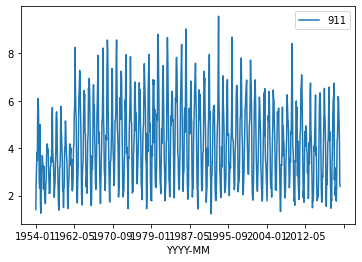

In [205]:
evapdf.plot.line(x='YYYY-MM',y='911') # Plot quadrant 911 evaporation time series 

In [207]:
evapdf[['911','912']] # pull out columns

911   912
0    1.42  1.30
1    2.59  2.51
2    3.21  3.21
3    3.83  3.54
4    3.48  3.97
..    ...   ...
787  5.96  6.06
788  5.17  5.39
789  4.47  4.39
790  2.49  2.40
791  2.39  2.31

[792 rows x 2 columns]

In [216]:
evapdf[evapdf['YYYY-MM'] == "1993-01"][['911','912']]  # get 2 columns from 1993-01 date in YYYY-MM

911   912
468  1.79  1.81

---

## References
Overland, B. (2018). Python Without Fear. Addison-Wesley 
ISBN 978-0-13-468747-6. 

Grus, Joel (2015). Data Science from Scratch: First Principles with Python O’Reilly
Media. Kindle Edition.

Precord, C. (2010) wxPython 2.8 Application Development Cookbook Packt Publishing Ltd. Birmingham , B27 6PA, UK 
ISBN 978-1-849511-78-0.

Johnson, J. (2020). Python Numpy Tutorial (with Jupyter and Colab). Retrieved September 15, 2020, from https://cs231n.github.io/python-numpy-tutorial/ 

Willems, K. (2019). (Tutorial) Python NUMPY Array TUTORIAL. Retrieved September 15, 2020, from https://www.datacamp.com/community/tutorials/python-numpy-tutorial?utm_source=adwords_ppc

Willems, K. (2017). NumPy Cheat Sheet: Data Analysis in Python. Retrieved September 15, 2020, from https://www.datacamp.com/community/blog/python-numpy-cheat-sheet

W3resource. (2020). NumPy: Compare two given arrays. Retrieved September 15, 2020, from https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-28.php

Sorting https://www.programiz.com/python-programming/methods/list/sort


https://www.oreilly.com/library/view/relational-theory-for/9781449365431/ch01.html

https://realpython.com/pandas-read-write-files/#using-pandas-to-write-and-read-excel-files